In [1]:
from pipeline import FullPipeWrapper
from grid_result_plot import create_result_plot
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
full_pipe = FullPipeWrapper()

positional data already downloaded.
reading positional data.
returning positional data.


In [3]:
lr_model = LogisticRegression()

lr_pipe = full_pipe.build_pipe(model=lr_model)

In [7]:
list(full_pipe.off_form_cols)

['FBL0_x',
 'FBR0_x',
 'HBL0_x',
 'HBL1_x',
 'HBR0_x',
 'HBR1_x',
 'QB0_x',
 'QB1_x',
 'RBL0_x',
 'RBL1_x',
 'RBL2_x',
 'RBR0_x',
 'RBR1_x',
 'RBR2_x',
 'TEL0_x',
 'TEL1_x',
 'TEL2_x',
 'TER0_x',
 'TER1_x',
 'TER2_x',
 'WRL0_x',
 'WRL1_x',
 'WRL2_x',
 'WRL3_x',
 'WRR0_x',
 'WRR1_x',
 'WRR2_x',
 'WRR3_x',
 'FBL0_y',
 'FBR0_y',
 'HBL0_y',
 'HBL1_y',
 'HBR0_y',
 'HBR1_y',
 'QB0_y',
 'QB1_y',
 'RBL0_y',
 'RBL1_y',
 'RBL2_y',
 'RBR0_y',
 'RBR1_y',
 'RBR2_y',
 'TEL0_y',
 'TEL1_y',
 'TEL2_y',
 'TER0_y',
 'TER1_y',
 'TER2_y',
 'WRL0_y',
 'WRL1_y',
 'WRL2_y',
 'WRL3_y',
 'WRR0_y',
 'WRR1_y',
 'WRR2_y',
 'WRR3_y',
 'FBL0_in',
 'FBR0_in',
 'HBL0_in',
 'HBL1_in',
 'HBR0_in',
 'HBR1_in',
 'QB0_in',
 'QB1_in',
 'RBL0_in',
 'RBL1_in',
 'RBL2_in',
 'RBR0_in',
 'RBR1_in',
 'RBR2_in',
 'TEL0_in',
 'TEL1_in',
 'TEL2_in',
 'TER0_in',
 'TER1_in',
 'TER2_in',
 'WRL0_in',
 'WRL1_in',
 'WRL2_in',
 'WRL3_in',
 'WRR0_in',
 'WRR1_in',
 'WRR2_in',
 'WRR3_in',
 'offenseFormation']

In [4]:
best_def_cols = [['%B','%M','%Z'],
                 ['DB','LB','DL','%B','%M','%Z'],
                 ['yardline_first_dir','yardline_100_dir','%B','%M','%Z'],
                 ['defendersInTheBox','numberOfPassRushers','yardline_first_dir','%M','%Z'],
                 ['yardline_first_dir','%B','%M'],
                 ['yardline_firsta_dir','yardline_100_dir','%B'],
                 ['DB','LB','DL'],
                 ['extra_blitzers','on_line_coverage','yardline_first_dir','yardline_100_dir'],
                 ['yardline_100_dir','yardline_first_dir','%B','%M'],
                 ['extra_blitzers','on_line_coverage','yardline_100_dir','yardline_first_dir'],
                 ['defendersInTheBox','numberOfPassRushers','yardline_first_dir']]

In [5]:
params = {'full_pipe__def__def_clust__cols': best_def_cols}
grid_lr_full = GridSearchCV(lr_pipe, params, cv=5, scoring='f1_macro')
grid_lr_full.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(remainder='passthrough',
                                                                                                                             transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', '

In [6]:
grid_lr_full.best_score_

0.2930714782528159

In [7]:
grid_lr_full.best_params_

{'full_pipe__def__def_clust__cols': ['yardline_first_dir',
  'yardline_100_dir',
  '%B',
  '%M',
  '%Z']}

In [12]:
params = {'full_pipe__def__def_clust__cols': [['yardline_first_dir',
                                              'yardline_100_dir',
                                              '%B',
                                              '%M',
                                              '%Z']],
          'full_pipe__def__def_clust__n_clusters': range(1, 6),
          'full_pipe__def__def_clust__pca_variance': [0.8, 0.85, 0.9, 0.95]
          }
grid_lr_full2 = GridSearchCV(lr_pipe, params, cv=5, scoring='f1_macro')
grid_lr_full2.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [13]:
grid_lr_full2.best_score_

0.2875304055474129

In [16]:
grid_lr_full2.best_params_

{'full_pipe__def__def_clust__cols': ['yardline_first_dir',
  'yardline_100_dir',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust__n_clusters': 5,
 'full_pipe__def__def_clust__pca_variance': 0.8}

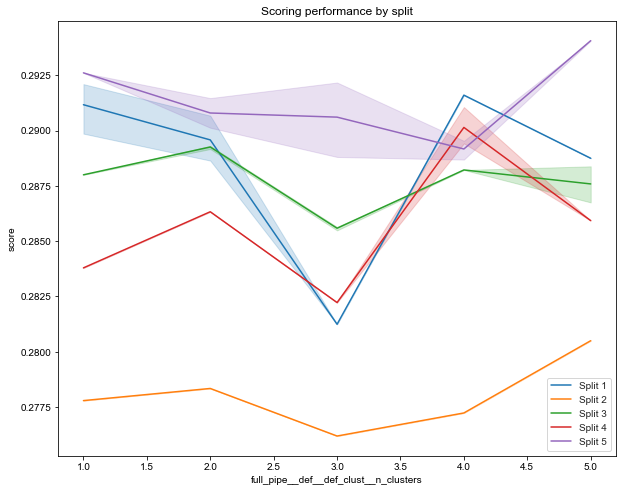

In [14]:
create_result_plot(grid_lr_full2, "full_pipe__def__def_clust__n_clusters")

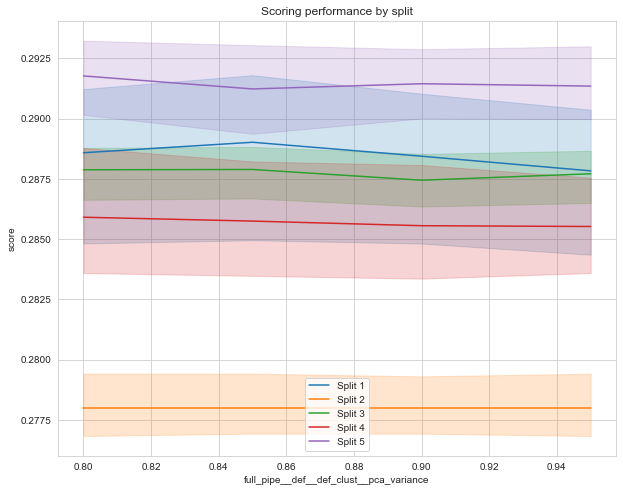

In [15]:
create_result_plot(grid_lr_full2, 'full_pipe__def__def_clust__pca_variance')

In [17]:
params_lr2 = {'full_pipe__def__def_clust__cols': [['yardline_first_dir',
                                                   'yardline_100_dir',
                                                   '%B',
                                                   '%M',
                                                   '%Z']],
              'full_pipe__def__def_clust__n_clusters': range(5, 10),
              'full_pipe__def__def_clust__pca_variance': [0.6, 0.7, 0.75, 0.8]}
grid_lr_full3 = GridSearchCV(lr_pipe, params_lr2, cv=5, scoring='f1_macro')
grid_lr_full3.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [18]:
grid_lr_full3.best_score_

0.28969223827594115

In [20]:
grid_lr_full3.best_params_

{'full_pipe__def__def_clust__cols': ['yardline_first_dir',
  'yardline_100_dir',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust__n_clusters': 7,
 'full_pipe__def__def_clust__pca_variance': 0.7}

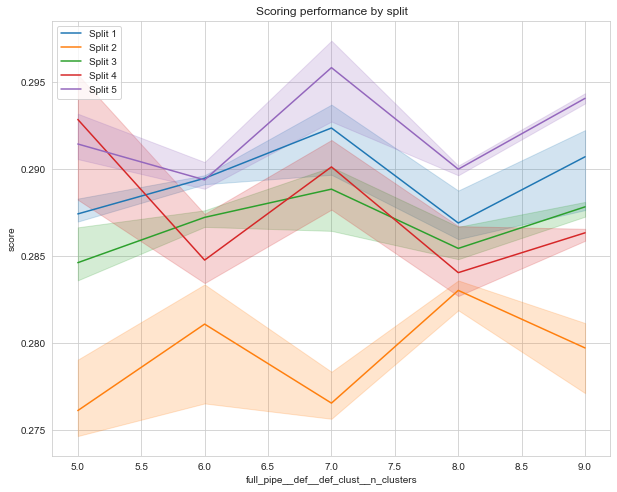

In [19]:
create_result_plot(grid_lr_full3, 'full_pipe__def__def_clust__n_clusters')

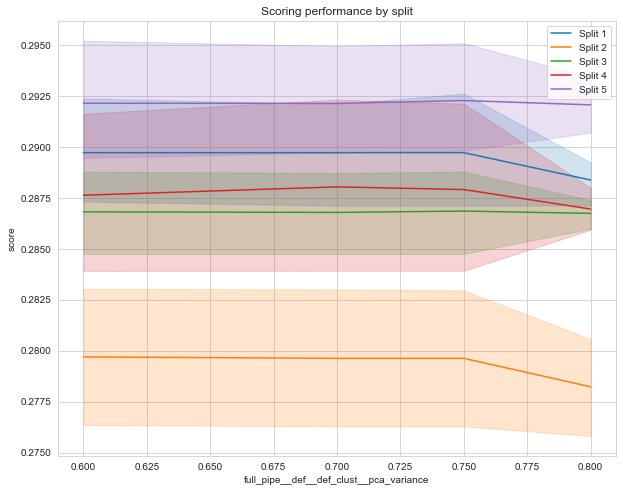

In [21]:
create_result_plot(grid_lr_full3, 'full_pipe__def__def_clust__pca_variance')

In [22]:
full_pipe.off_info_cols

Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')

In [23]:
full_pipe.off_form_cols

Index(['FBL0_x', 'FBR0_x', 'HBL0_x', 'HBL1_x', 'HBR0_x', 'HBR1_x', 'QB0_x',
       'QB1_x', 'RBL0_x', 'RBL1_x', 'RBL2_x', 'RBR0_x', 'RBR1_x', 'RBR2_x',
       'TEL0_x', 'TEL1_x', 'TEL2_x', 'TER0_x', 'TER1_x', 'TER2_x', 'WRL0_x',
       'WRL1_x', 'WRL2_x', 'WRL3_x', 'WRR0_x', 'WRR1_x', 'WRR2_x', 'WRR3_x',
       'FBL0_y', 'FBR0_y', 'HBL0_y', 'HBL1_y', 'HBR0_y', 'HBR1_y', 'QB0_y',
       'QB1_y', 'RBL0_y', 'RBL1_y', 'RBL2_y', 'RBR0_y', 'RBR1_y', 'RBR2_y',
       'TEL0_y', 'TEL1_y', 'TEL2_y', 'TER0_y', 'TER1_y', 'TER2_y', 'WRL0_y',
       'WRL1_y', 'WRL2_y', 'WRL3_y', 'WRR0_y', 'WRR1_y', 'WRR2_y', 'WRR3_y',
       'FBL0_in', 'FBR0_in', 'HBL0_in', 'HBL1_in', 'HBR0_in', 'HBR1_in',
       'QB0_in', 'QB1_in', 'RBL0_in', 'RBL1_in', 'RBL2_in', 'RBR0_in',
       'RBR1_in', 'RBR2_in', 'TEL0_in', 'TEL1_in', 'TEL2_in', 'TER0_in',
       'TER1_in', 'TER2_in', 'WRL0_in', 'WRL1_in', 'WRL2_in', 'WRL3_in',
       'WRR0_in', 'WRR1_in', 'WRR2_in', 'WRR3_in', 'offenseFormation'],
      dtype='object')

In [29]:
params_lr4 = {'full_pipe__def__def_clust__cols': [['yardline_first_dir',
                                                   'yardline_100_dir',
                                                   '%B',
                                                   '%M',
                                                   '%Z']],
              'full_pipe__def__def_clust__n_clusters': [7],
              'full_pipe__def__def_clust__pca_variance': [0.7],
              'full_pipe__off__full_cols__select_cols__columns':
              [list(full_pipe.off_info_cols) + list(full_pipe.off_form_cols),
              list(full_pipe.off_info_cols) + ['offensiveFormation'],
              ['perc_left', 'perc_right', 'perc_behind_los', 'offensiveFormation']
               ]
              }
grid_lr_full4 = GridSearchCV(lr_pipe, params_lr4, cv=5, scoring='f1_macro')
grid_lr_full4.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [32]:
params5 = {'full_pipe__def__def_clust__cols': [['yardline_first_dir',
                                                'yardline_100_dir',
                                                '%B',
                                                '%M',
                                                '%Z']],
           'full_pipe__def__def_clust__n_clusters': [7],
           'full_pipe__def__def_clust__pca_variance': [0.7],
           'model__C': [10**x for x in range(-3, 4)]
           }
grid_lr_full5 = GridSearchCV(lr_pipe, params5, cv=5, scoring='f1_macro')
grid_lr_full5.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [33]:
grid_lr_full5.best_score_

0.2900046570161917

In [34]:
grid_lr_full5.best_params_

{'full_pipe__def__def_clust__cols': ['yardline_first_dir',
  'yardline_100_dir',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust__n_clusters': 7,
 'full_pipe__def__def_clust__pca_variance': 0.7,
 'model__C': 1000}

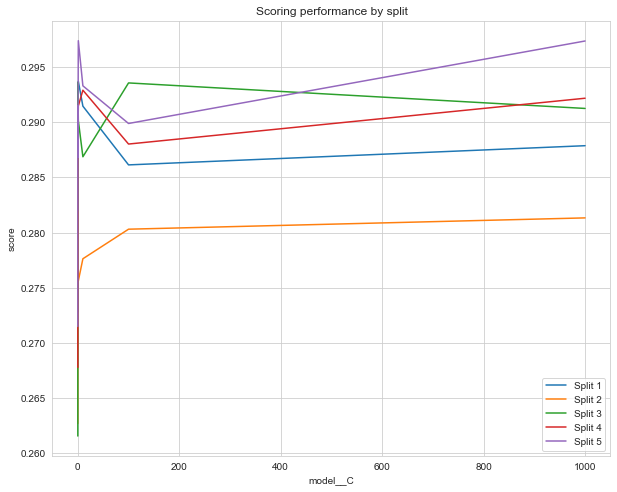

In [35]:
create_result_plot(grid_lr_full5, "model__C")

In [36]:
params6 = {'full_pipe__def__def_clust__cols': [['yardline_first_dir',
                                                'yardline_100_dir',
                                                '%B',
                                                '%M',
                                                '%Z']],
           'full_pipe__def__def_clust__n_clusters': [7],
           'full_pipe__def__def_clust__pca_variance': [0.7],
           'model__C': [10**x for x in range(3, 7)]
           }
grid_lr_full6 = GridSearchCV(lr_pipe, params6, cv=5, scoring='f1_macro')
grid_lr_full6.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [37]:
grid_lr_full6.best_score_

0.290214705536075

In [38]:
grid_lr_full6.best_params_

{'full_pipe__def__def_clust__cols': ['yardline_first_dir',
  'yardline_100_dir',
  '%B',
  '%M',
  '%Z'],
 'full_pipe__def__def_clust__n_clusters': 7,
 'full_pipe__def__def_clust__pca_variance': 0.7,
 'model__C': 1000}

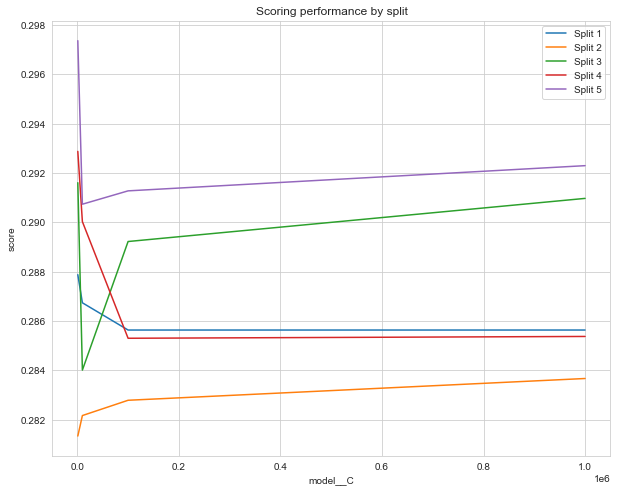

In [39]:
create_result_plot(grid_lr_full6, 'model__C')

In [41]:
grid_lr_best = grid_lr_full6

In [43]:
from sklearn.metrics import classification_report

y_pred_lr_train = grid_lr_best.predict(full_pipe.X_train)
print(classification_report(full_pipe.y_train_x, y_pred_lr_train))

              precision    recall  f1-score   support

           1       0.39      0.12      0.18      2660
           2       0.46      0.81      0.59      5515
           3       0.42      0.39      0.40      3721
           4       0.40      0.00      0.00      2016

    accuracy                           0.45     13912
   macro avg       0.42      0.33      0.29     13912
weighted avg       0.43      0.45      0.38     13912



In [46]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(full_pipe.y_train_x, y_pred_lr_train))

[[ 306 1842  510    2]
 [ 233 4466  812    4]
 [ 166 2112 1443    0]
 [  84 1244  684    4]]


In [48]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(full_pipe.X_train, full_pipe.y_train_x)

DummyClassifier(strategy='most_frequent')

In [49]:
y_pred_x_dummy = dummy.predict(full_pipe.X_train)
print(classification_report(full_pipe.y_train_x, y_pred_x_dummy))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2660
           2       0.40      1.00      0.57      5515
           3       0.00      0.00      0.00      3721
           4       0.00      0.00      0.00      2016

    accuracy                           0.40     13912
   macro avg       0.10      0.25      0.14     13912
weighted avg       0.16      0.40      0.23     13912



In [50]:
from sklearn.ensemble import RandomForestClassifier

rfor = RandomForestClassifier(random_state=0)
rfor_pipe = full_pipe.build_pipe(model=rfor)

In [51]:
params = {'full_pipe__def__def_clust__cols': best_def_cols}
grid_rfor_full = GridSearchCV(rfor_pipe, params, cv=5, scoring='f1_macro')
grid_rfor_full.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [52]:
grid_rfor_full.best_score_

0.27389671981320723

In [53]:
grid_rfor_full.best_params_

{'full_pipe__def__def_clust__cols': ['defendersInTheBox',
  'numberOfPassRushers',
  'yardline_first_dir']}

In [56]:
params_rfor2 = {'full_pipe__def__def_clust__cols': [['defendersInTheBox',
                                                    'numberOfPassRushers',
                                                    'yardline_first_dir']],
                'full_pipe__def__def_clust__n_clusters': range(1, 6),
                'full_pipe__def__def_clust__pca_variance': [0.8, 0.85, 0.9, 0.95]}
grid_rfor_full2 = GridSearchCV(rfor_pipe, params_rfor2, cv=5, scoring='f1_macro')
grid_rfor_full2.fit(full_pipe.X_train, full_pipe.y_train_x)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR'],
      dtype='object')),
                                                  

In [61]:
list(full_pipe.X_train.columns)

['FBL0_x',
 'FBR0_x',
 'HBL0_x',
 'HBL1_x',
 'HBR0_x',
 'HBR1_x',
 'QB0_x',
 'QB1_x',
 'RBL0_x',
 'RBL1_x',
 'RBL2_x',
 'RBR0_x',
 'RBR1_x',
 'RBR2_x',
 'TEL0_x',
 'TEL1_x',
 'TEL2_x',
 'TER0_x',
 'TER1_x',
 'TER2_x',
 'WRL0_x',
 'WRL1_x',
 'WRL2_x',
 'WRL3_x',
 'WRR0_x',
 'WRR1_x',
 'WRR2_x',
 'WRR3_x',
 'FBL0_y',
 'FBR0_y',
 'HBL0_y',
 'HBL1_y',
 'HBR0_y',
 'HBR1_y',
 'QB0_y',
 'QB1_y',
 'RBL0_y',
 'RBL1_y',
 'RBL2_y',
 'RBR0_y',
 'RBR1_y',
 'RBR2_y',
 'TEL0_y',
 'TEL1_y',
 'TEL2_y',
 'TER0_y',
 'TER1_y',
 'TER2_y',
 'WRL0_y',
 'WRL1_y',
 'WRL2_y',
 'WRL3_y',
 'WRR0_y',
 'WRR1_y',
 'WRR2_y',
 'WRR3_y',
 'FBL0_in',
 'FBR0_in',
 'HBL0_in',
 'HBL1_in',
 'HBR0_in',
 'HBR1_in',
 'QB0_in',
 'QB1_in',
 'RBL0_in',
 'RBL1_in',
 'RBL2_in',
 'RBR0_in',
 'RBR1_in',
 'RBR2_in',
 'TEL0_in',
 'TEL1_in',
 'TEL2_in',
 'TER0_in',
 'TER1_in',
 'TER2_in',
 'WRL0_in',
 'WRL1_in',
 'WRL2_in',
 'WRL3_in',
 'WRR0_in',
 'WRR1_in',
 'WRR2_in',
 'WRR3_in',
 'gameId',
 'playId',
 'offenseFormation',
 'gamePlayI